In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Import Dataset

In [48]:
df = pd.read_csv('/Users/supisara/Desktop/ML dataset/online_shoppers_intention.csv')
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


### Class Balance

/var/folders/fx/27js0hwx7xjcb4mhfn8vj0lr0000gn/T/ipykernel_40871/2202984919.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='Revenue', data=df, palette='Set2')


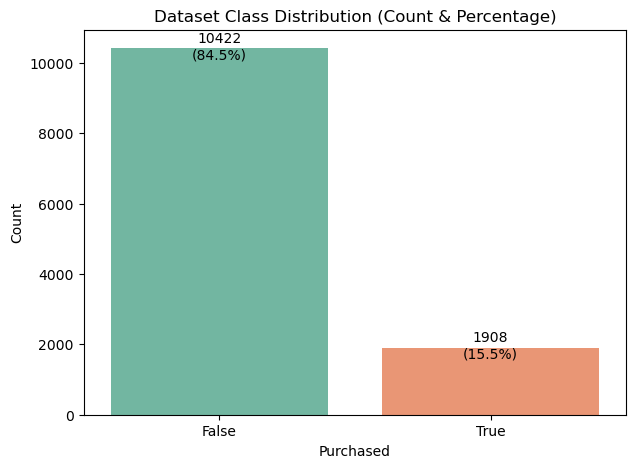

In [50]:
# Plot class distribution of the target variable (Revenue)
plt.figure(figsize=(7, 5))
ax = sns.countplot(x='Revenue', data=df, palette='Set2')

# Calculate percentages
total = len(df)
percentages = df['Revenue'].value_counts(normalize=True) * 100

# Add annotations
for p in ax.patches:
    height = p.get_height()
    category = p.get_x() + p.get_width() / 2.
    percentage = percentages.iloc[int(round(category))]
    ax.text(
        category,
        height + 50,
        f'{int(height)}\n({percentage:.1f}%)',
        ha='center',
        va='center'
    )

plt.title('Dataset Class Distribution (Count & Percentage)')
plt.xlabel('Purchased')
plt.ylabel('Count')
plt.show()

### Distribution Comparison (KDE Plots)

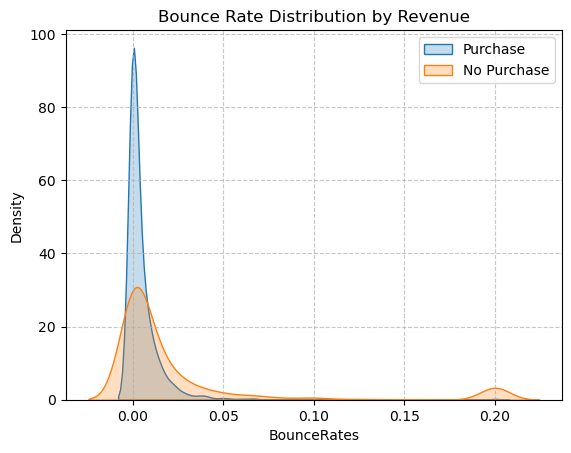

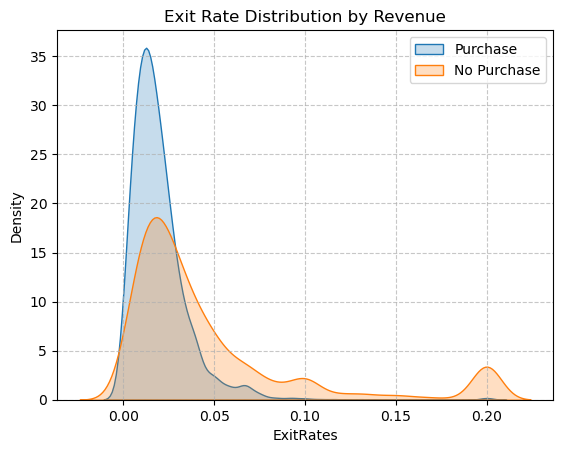

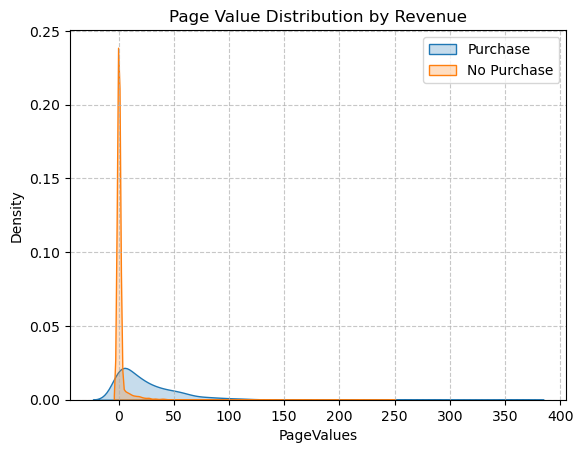

In [52]:
# Plot Bounce Rate
sns.kdeplot(df[df['Revenue'] == 1]['BounceRates'], label='Purchase', fill=True)
sns.kdeplot(df[df['Revenue'] == 0]['BounceRates'], label='No Purchase', fill=True)
plt.title("Bounce Rate Distribution by Revenue")
plt.xlabel("BounceRates")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

# Plot Exit Rate
sns.kdeplot(df[df['Revenue'] == 1]['ExitRates'], label='Purchase', fill=True)
sns.kdeplot(df[df['Revenue'] == 0]['ExitRates'], label='No Purchase', fill=True)
plt.title("Exit Rate Distribution by Revenue")
plt.xlabel("ExitRates")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

# Plot Page Value
sns.kdeplot(df[df['Revenue'] == 1]['PageValues'], label='Purchase', fill=True)
sns.kdeplot(df[df['Revenue'] == 0]['PageValues'], label='No Purchase', fill=True)
plt.title("Page Value Distribution by Revenue")
plt.xlabel("PageValues")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

### Month Distribution

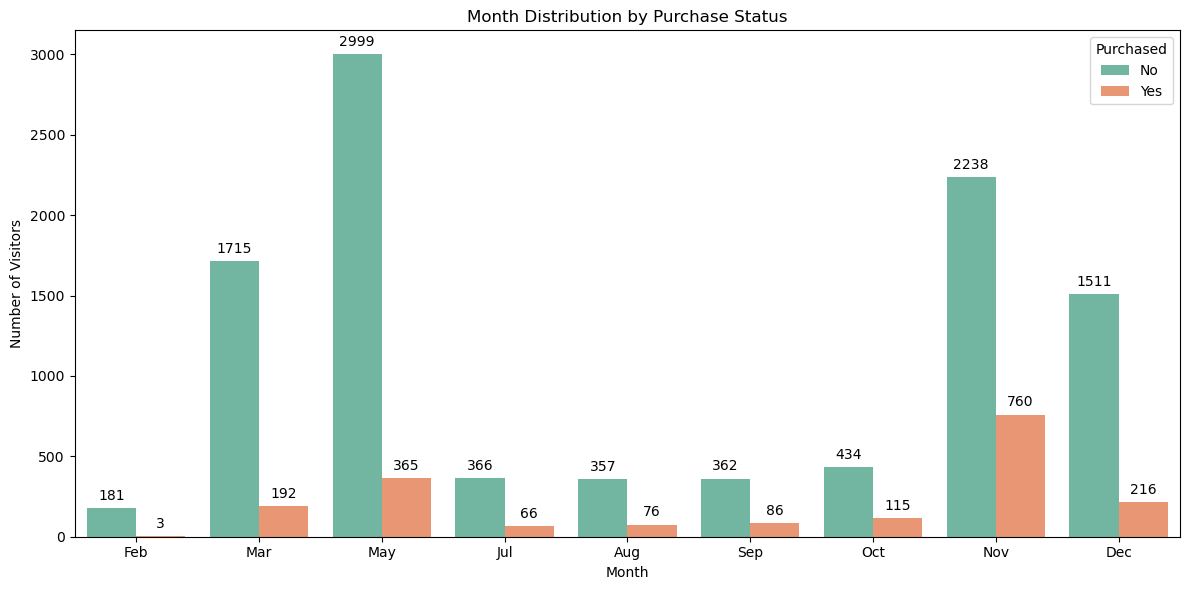

In [54]:
# Put months in order
month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

# Filter to only include months present in the dataset
months_in_data = df['Month'].unique()
month_order = [month for month in month_order if month in months_in_data]

plt.figure(figsize=(12, 6))
ax = sns.countplot(x='Month', data=df, hue='Revenue', order=month_order, palette= 'Set2')

# Add annotations
for p in ax.patches:
    height = p.get_height()
    if height > 0:  # Skip if height is 0
        ax.text(
            p.get_x() + p.get_width()/2., 
            height + 50, 
            f'{height:.0f}', 
            ha='center'
        )

plt.title('Month Distribution by Purchase Status')
plt.xlabel('Month')
plt.ylabel('Number of Visitors')
plt.legend(title='Purchased', labels=['No', 'Yes'])
plt.tight_layout()

### Purchase Rate by Month

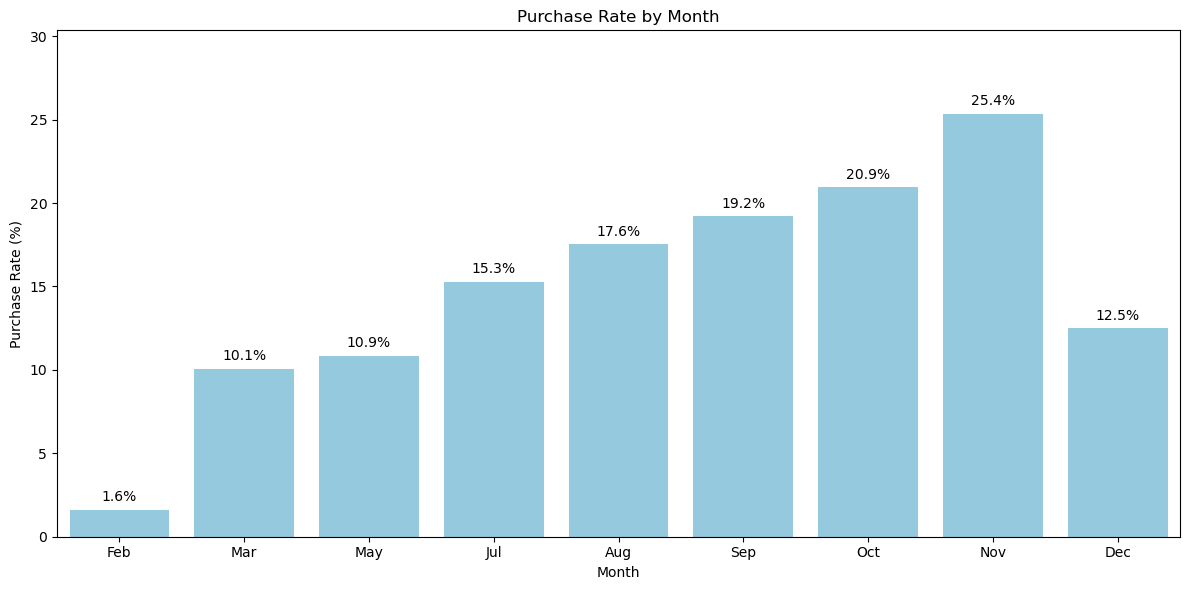

In [56]:
plt.figure(figsize=(12, 6))
# Calculate monthly purchase rate by %
monthly_purchase_rate = df.groupby('Month')['Revenue'].mean().loc[month_order] * 100
ax = sns.barplot(x=monthly_purchase_rate.index, y=monthly_purchase_rate.values, order=month_order, color='skyblue')

# Add annotations
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2., height + 0.5,
            f'{height:.1f}%', ha="center")

plt.title('Purchase Rate by Month')
plt.xlabel('Month')
plt.ylabel('Purchase Rate (%)')
plt.ylim(0, monthly_purchase_rate.max() + 5)
plt.tight_layout()

plt.show()

### Visitor Type

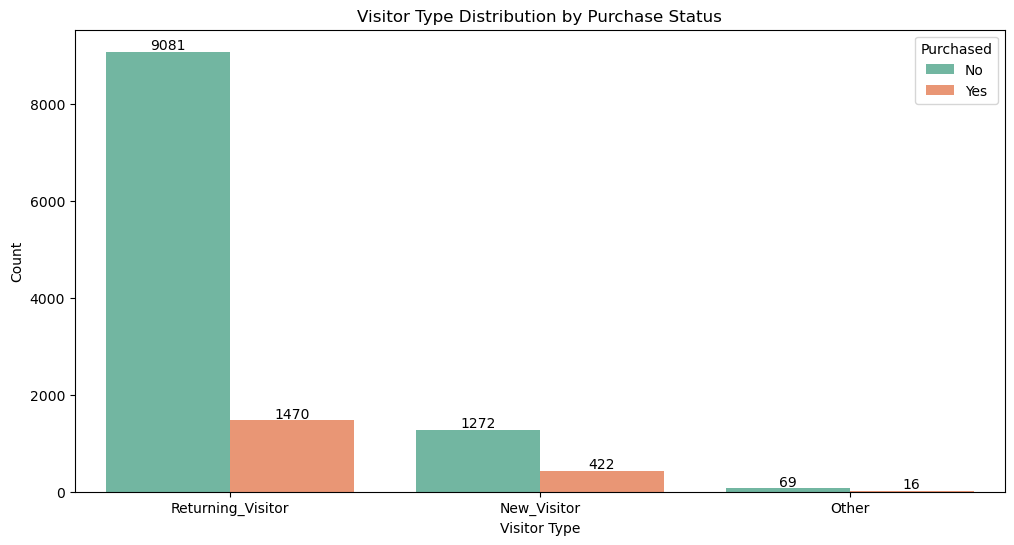

In [58]:
# Plot Visitor Types
plt.figure(figsize=(12, 6))
ax = sns.countplot(x='VisitorType', data=df, hue='Revenue', palette='Set2', order=df['VisitorType'].value_counts().index)

# Add annotations
for p in ax.patches:
    height = p.get_height()
    if height > 0:  # Skip if height is 0
        ax.text(
            p.get_x() + p.get_width()/2., 
            height + 50, 
            f'{height:.0f}', 
            ha='center'
        )

plt.title('Visitor Type Distribution by Purchase Status')
plt.xlabel('Visitor Type')
plt.ylabel('Count')
plt.legend(title='Purchased', labels=['No', 'Yes'])